In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from PIL import Image
def image_to_tensor(file):
    img = Image.open(file)
    return tf.convert_to_tensor(img)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

Displaying an image

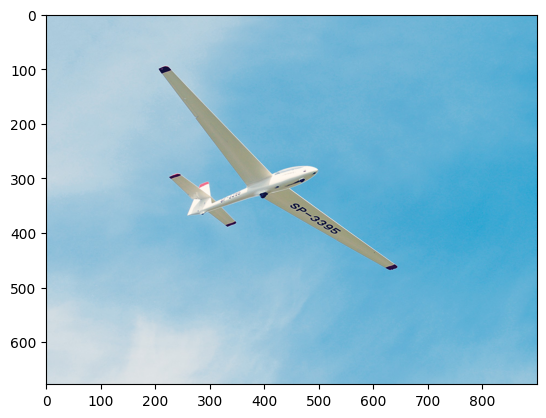

In [6]:
img = cv2.imread("/kaggle/input/anyas-gojo-revival-aerospace-enigma/train/glider/image100.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
data_dir = '/kaggle/input/new-datas/anyas-gojo-revival-aerospace-enigma/train'
image_exts = ['jpeg' , 'bmp', 'png']

This checks whther any of the images have any problem in being opened, if there are, they are discarded

In [9]:
data_dir = '/kaggle/input/test-datas/test'
for image in os.listdir(data_dir):
    
    image_path = os.path.join(data_dir, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
                #print('Image not in ext list{}',format(image_path))
                #os.remove(image_path)
            print(tip)
            print(image_path)
    except Exception as e:
            #print('Issue with image {}'.format(image_path))
            #os.remove(image_path)
        print("Error opening the following path: ")
        print(tip)
        print(image_path)

Converting the image files into tensor and classifying them into each type

In [11]:
d = '/kaggle/input/new-datas/anyas-gojo-revival-aerospace-enigma/train'
data = tf.keras.utils.image_dataset_from_directory(d)
print(data)

Found 2310 files belonging to 5 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [12]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
print(batch[0].shape)

(32, 256, 256, 3)


In [13]:
#This basically prints all the labels of each picture
batch[1]

array([3, 3, 4, 1, 2, 1, 2, 2, 4, 0, 2, 1, 2, 4, 1, 1, 1, 0, 0, 4, 3, 0,
       1, 0, 3, 2, 2, 4, 3, 2, 3, 2], dtype=int32)

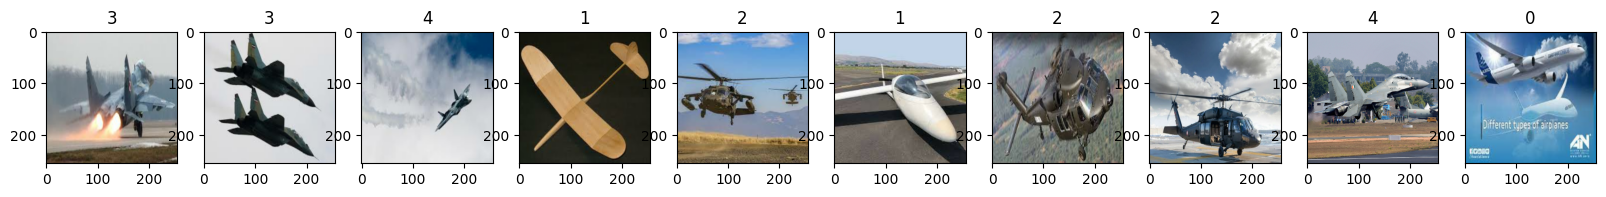

In [15]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

* Commercial = 0
* Glider = 1
* Helicopter = 2
* MIG-29 = 3
* Sukhoi = 4

In [16]:
scaled = batch[0] / 255
scaled.max()

1.0

# Preprocessing Data

Scaling Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()
batch[0].shape

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Splitting Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = len(data) - train_size - val_size

In [ ]:
print(len(data))
print(train_size)
print(val_size)
print(test_size)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
print(len(test))

# Training the Data

Building the Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

#Adding a convolution layer and a max pooling layer
model.add(Conv2D(16, (3,3) , 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(5, activation = 'sigmoid'))


In [ ]:
model.compile('adam', loss = tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Training the data

In [ ]:
os.rmdir("/kaggle/working/logs")

In [ ]:
os.makedirs('/kaggle/working/logs')

In [ ]:
logdir = '/kaggle/working/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
print(train)

In [ ]:
hist = model.fit(train, epochs = 40, validation_data = val, callbacks=[tensorboard_callback])

Plotting Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluating Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
pre = Precision
re = Recall()
print(type(test))

In [ ]:
for batch in test.as_numpy_iterator():
    X, Y = batch
    yhat = model.predict(X)
print(yhat)

In [ ]:
y_classes = [np.argmax(element) for element in yhat]
print(y_classes[:5])
print(Y[:5])

In [ ]:
classes = ['Commercial', 'Glider', 'Helicopter', 'MIG-29', 'Sukhoi']

In [ ]:
img = cv2.imread('/kaggle/input/test-datas/test/image105.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
np.argmax(yhat)

In [ ]:
def image_predictor(filename):
    img = cv2.imread(filename)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    x = yhat[0]
    print(x)
    return int(np.argmax(yhat))

In [ ]:
print(np.argmax(0.9))
a = image_predictor('/kaggle/input/test-datas/test/image39.jpg')
print (type(a))
print(a)

In [ ]:
def number_return()

In [ ]:
a = image_predictor('/kaggle/input/test-datas/test/image105.jpg')
prediction = []
for image in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image)
    prediction.append([image, image_predictor(image_path)])
print(prediction[:5])

In [ ]:
file_names = []
file_prediction = []
for i in range(len(prediction)):
    file_names.append(prediction[i][0])
    file_prediction.append(classes[prediction[i][1]])
df = pd.DataFrame(file_names, columns=['image_path'])
ser = pd.Series(file_prediction)
df.insert(loc = 1, column='Class', value=ser)
df

In [ ]:
df.to_csv('image_sub.csv')